## Random Forests

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
! python -m pip install pydotplus
! pip install graphviz
import statistics
from sklearn.model_selection import cross_val_score



In [39]:
pathways = pd.read_csv('KEGG_7pathways_steps.csv')
pathways = pathways.drop(['Unnamed: 0'], axis=1)
pathways.set_index('studyID',inplace=True)

In [90]:
pcs = pd.read_csv('PC_final result(use in modeling) (1).csv')
pcs = pcs.iloc[:,:6]
pcs.set_index('studyID',inplace = True)
pathways_2 = pd.read_csv('KEGG_7pathways_steps.csv')
pathways_2 = pathways_2.drop(['Unnamed: 0', 'Group', 'Age', 
       'path:hsa03040-mean',
       'path:hsa03040-variance', 'path:hsa03050-mean',
       'path:hsa03050-variance', 'path:hsa03060-mean',
       'path:hsa03060-variance', 'path:hsa04130-mean',
       'path:hsa04130-variance', 'path:hsa04141-mean',
       'path:hsa04141-variance', 'path:hsa04662-mean',
       'path:hsa04662-variance', 'path:hsa05220-mean',
       'path:hsa05220-variance'], axis=1)
pathways_2.set_index('studyID', inplace = True)
pcs = pcs.merge(pathways_2, how = 'outer', on ='studyID')
pcs.head()

,PC1,PC2,PC3,PC4,PC5,Gender,BMI,Weight_loss_band,Steps
studyID,,,,,,,,,
2001,8.061646,-5.761836,-4.841193,-2.171323,-2.788218,0,36.24,1,10723.455560
2002,8.430937,6.946562,1.794457,-0.015105,-3.024961,1,35.71,0,4654.916667
2003,8.256683,8.288072,2.570019,-0.302641,-3.554665,1,42.80,0,5675.133333
2004,8.376866,-0.916554,-6.212482,1.182002,-0.328640,0,26.72,1,9855.843373
2006,8.258802,0.870977,4.219331,0.654543,-3.580225,1,43.89,0,7595.388889


In [38]:
demographics = pathways.drop(['Steps','path:hsa03040-mean',
       'path:hsa03040-variance', 'path:hsa03050-mean',
       'path:hsa03050-variance', 'path:hsa03060-mean',
       'path:hsa03060-variance', 'path:hsa04130-mean',
       'path:hsa04130-variance', 'path:hsa04141-mean',
       'path:hsa04141-variance', 'path:hsa04662-mean',
       'path:hsa04662-variance', 'path:hsa05220-mean',
       'path:hsa05220-variance'], axis = 1)
demographics.head()

,Group,Age,Gender,BMI,Weight_loss_band
studyID,,,,,
2001,0,28,0,36.24,1
2002,1,38,1,35.71,0
2003,0,26,1,42.80,0
2004,1,60,0,26.72,1
2006,1,48,1,43.89,0


In [50]:
steps = pathways.drop(['path:hsa03040-mean',
       'path:hsa03040-variance', 'path:hsa03050-mean',
       'path:hsa03050-variance', 'path:hsa03060-mean',
       'path:hsa03060-variance', 'path:hsa04130-mean',
       'path:hsa04130-variance', 'path:hsa04141-mean',
       'path:hsa04141-variance', 'path:hsa04662-mean',
       'path:hsa04662-variance', 'path:hsa05220-mean',
       'path:hsa05220-variance'], axis=1)

Grid for Randomized Search CV - Hyperparameter Tuning

In [40]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 400,num=10)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5,7,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4,5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

## Demographic Data

In [42]:
X_dem = demographics[['Group', 'Age', 'Gender', 'BMI']]
Y_dem = demographics['Weight_loss_band']                  
X_train, X_test, y_train, y_test = train_test_split(X_dem,Y_dem, test_size = 0.2, random_state=42)

In [43]:
rf = RandomForestClassifier()
rf_random= RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   20.0s finished
/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [20, 62, 104, 146, 188, 231, 273, 315, 357, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 14, 26, 38, 50, None], 'min_samples_split': [2, 5, 7, 10], 'min_samples_leaf': [1, 2, 3, 4, 5], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [44]:
rf_random.best_params_

{'n_estimators': 62,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 38,
 'bootstrap': True}

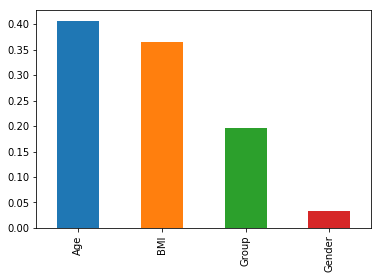

In [45]:
random_forest = RandomForestClassifier(n_estimators = 188,
 min_samples_split = 10,
 min_samples_leaf = 2,
 max_features = 'sqrt',
 max_depth = 50,
 bootstrap = True , random_state = 42)
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
importance = pd.Series(random_forest.feature_importances_, index=X_dem.columns)
importance.nlargest(10).plot(kind='bar');
plt.show()

In [83]:
random_state = list(range(1,200))
#print(random_state)
d1_train_acc = []
d1_test_acc = []
d1_auc_score = []

for i in random_state :
    
    X_dem = demographics[['Group', 'Age', 'Gender', 'BMI']]
    Y_dem = demographics['Weight_loss_band']
    
    X_train, X_test, y_train, y_test= train_test_split(X_dem,Y_dem, test_size = 0.3, random_state = i) 
    
    random_forest= RandomForestClassifier(n_estimators = 188,
     min_samples_split = 10,
     min_samples_leaf = 2,
     max_features = 'sqrt',
     max_depth = 50,
     bootstrap = True , random_state = 42)
    
    random_forest.fit(X_train,y_train)
    y_pred = random_forest.predict(X_test) 

    rf_train_acc = random_forest.score(X_train, y_train)
    rf_test_acc = accuracy_score(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)

    d1_train_acc.append(rf_train_acc)
    d1_test_acc.append(rf_test_acc)
    d1_auc_score.append(auc_score)
    

print('Mean Training Accuracy:', np.mean(d1_train_acc)) 
print('Mean Test Accuracy:', np.mean(d1_test_acc))
print(statistics.stdev(d1_test_acc))

print('AUC score equals',np.mean(d1_auc_score))
print('Standard Deviation for auc score',statistics.stdev(d1_auc_score))

Mean Training Accuracy: 0.8603272774127046
Mean Test Accuracy: 0.649127992905705
0.09539699493314409
AUC score equals 0.5681719801694676
Standard Deviation for auc score 0.10595317408818809


k-fold Cross Validation

In [84]:
scores = cross_val_score(rf,X_train,y_train, cv=5)
scores               
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.53 (+/- 0.42)


/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Steps

In [51]:
X_st = steps[['Group', 'Age', 'Gender', 'BMI', 'Steps']]
Y_st =steps['Weight_loss_band']                  
X_train, X_test, y_train, y_test = train_test_split(X_st,Y_st, test_size = 0.2, random_state=42)

In [52]:
rf = RandomForestClassifier()
rf_random= RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   20.8s finished
/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [20, 62, 104, 146, 188, 231, 273, 315, 357, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 14, 26, 38, 50, None], 'min_samples_split': [2, 5, 7, 10], 'min_samples_leaf': [1, 2, 3, 4, 5], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [54]:
rf_random.best_params_

{'n_estimators': 104,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 2,
 'bootstrap': False}

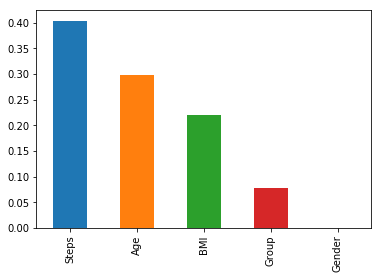

In [55]:
random_forest = RandomForestClassifier(n_estimators = 104,
 min_samples_split = 10,
 min_samples_leaf = 3,
 max_features = 'auto',
 max_depth = 2,
 bootstrap =  False)
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
importance= pd.Series(random_forest.feature_importances_, index=X_st.columns)
importance.nlargest(5).plot(kind='bar');
plt.show()

In [81]:
random_state = list(range(1,200))

d1_train_acc = []
d1_test_acc = []
d1_auc_score = []

for i in random_state :
    
    X_steps = pathways[['Group', 'Age', 'Gender', 'BMI',  'Steps']]
    Y_steps = steps['Weight_loss_band']
    
    X_train, X_test, y_train, y_test= train_test_split(X_steps,Y_steps, test_size = 0.2, random_state = i) 
    
    random_forest= RandomForestClassifier(n_estimators = 104,
     min_samples_split = 10,
     min_samples_leaf = 3,
     max_features = 'auto',
     max_depth = 2,
     bootstrap =  False)
    
    random_forest.fit(X_train,y_train)
    y_pred = random_forest.predict(X_test) 

    rf_train_acc = random_forest.score(X_train, y_train)
    rf_test_acc = accuracy_score(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)

    d1_train_acc.append(rf_train_acc)
    d1_test_acc.append(rf_test_acc)
    d1_auc_score.append(auc_score)
    

print('Mean Training Accuracy:', np.mean(d1_train_acc)) 
print('Mean Test Accuracy:', np.mean(d1_test_acc))
print(statistics.stdev(d1_test_acc))

print('AUC score equals',np.mean(d1_auc_score))
print('Standard Deviation for auc score',statistics.stdev(d1_auc_score))

Mean Training Accuracy: 0.8434216537231615
Mean Test Accuracy: 0.6813232830820769
0.12518844116755168
AUC score equals 0.5991893087370475
Standard Deviation for auc score 0.13282332106968303


In [82]:
scores = cross_val_score(rf,X_train,y_train, cv=5)
scores               
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.68 (+/- 0.16)


/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Pathways

In [67]:
X_pa = pathways[['Group', 'Age', 'Gender', 'BMI', 'Steps',
       'path:hsa03040-mean', 'path:hsa03040-variance', 'path:hsa03050-mean',
       'path:hsa03050-variance', 'path:hsa03060-mean',
       'path:hsa03060-variance', 'path:hsa04130-mean',
       'path:hsa04130-variance', 'path:hsa04141-mean',
       'path:hsa04141-variance', 'path:hsa04662-mean',
       'path:hsa04662-variance', 'path:hsa05220-mean',
       'path:hsa05220-variance']]
Y_pa =pathways['Weight_loss_band']                  
X_train, X_test, y_train, y_test = train_test_split(X_pa,Y_pa, test_size = 0.2, random_state=42)

In [68]:
rf = RandomForestClassifier()
rf_random= RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   20.1s finished
/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 62,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 2,
 'bootstrap': False}

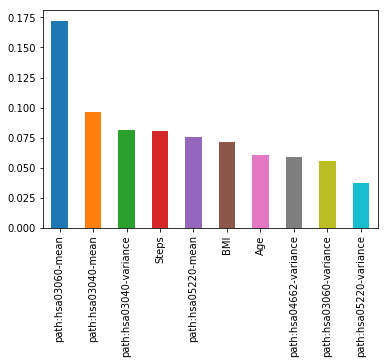

In [69]:
random_forest = RandomForestClassifier(n_estimators = 273,
 min_samples_split = 5,
 min_samples_leaf = 3,
 max_features = 'sqrt',
 criterion = 'entropy',
 max_depth = 2,
 bootstrap = True)
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
importance = pd.Series(random_forest.feature_importances_, index=X_pa.columns)
importance.nlargest(10).plot(kind='bar');
plt.show()

In [79]:
random_state = list(range(1,200))

d1_train_acc = []
d1_test_acc = []
d1_auc_score = []

for i in random_state :
    
    X_pa = pathways[['Group', 'Age', 'Gender', 'BMI', 'Steps',
       'path:hsa03040-mean', 'path:hsa03040-variance', 'path:hsa03050-mean',
       'path:hsa03050-variance', 'path:hsa03060-mean',
       'path:hsa03060-variance', 'path:hsa04130-mean',
       'path:hsa04130-variance', 'path:hsa04141-mean',
       'path:hsa04141-variance', 'path:hsa04662-mean',
       'path:hsa04662-variance', 'path:hsa05220-mean',
       'path:hsa05220-variance']]
    Y_pa = pathways['Weight_loss_band']
    
    X_train, X_test, y_train, y_test= train_test_split(X_pa,Y_pa, test_size = 0.2, random_state = i) 
    
    random_forest= RandomForestClassifier(n_estimators = 104,
     min_samples_split = 10,
     min_samples_leaf = 3,
     max_features = 'auto',
     max_depth = 2,
     bootstrap =  False)
    
    random_forest.fit(X_train,y_train)
    y_pred = random_forest.predict(X_test) 

    rf_train_acc = random_forest.score(X_train, y_train)
    rf_test_acc = accuracy_score(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)

    d1_train_acc.append(rf_train_acc)
    d1_test_acc.append(rf_test_acc)
    d1_auc_score.append(auc_score)
    

print('Mean Training Accuracy:', np.mean(d1_train_acc)) 
print('Mean Test Accuracy:', np.mean(d1_test_acc))
print(statistics.stdev(d1_test_acc))

print('AUC score equals',np.mean(d1_auc_score))
print('Standard Deviation for auc score',statistics.stdev(d1_auc_score))

Mean Training Accuracy: 0.912745545911375
Mean Test Accuracy: 0.614321608040201
0.12143952958386035
AUC score equals 0.5350908583320644
Standard Deviation for auc score 0.13826336112088103


In [80]:
scores = cross_val_score(rf,X_train,y_train, cv=5)
scores               
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.59 (+/- 0.13)


/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Extra model without some pathways

In [74]:
random_state = list(range(1,200))

d1_train_acc = []
d1_test_acc = []
d1_auc_score = []

for i in random_state :
    
    X_pa = pathways[['Group', 'Age', 'Gender', 'BMI', 'Steps',
       'path:hsa03040-mean', 'path:hsa03040-variance', 'path:hsa03050-mean',
       'path:hsa03050-variance', 'path:hsa03060-mean',
       'path:hsa03060-variance']]
    Y_pa = pathways['Weight_loss_band']
    
    X_train, X_test, y_train, y_test= train_test_split(X_pa,Y_pa, test_size = 0.2, random_state = i) 
    
    random_forest= RandomForestClassifier(n_estimators = 104,
     min_samples_split = 10,
     min_samples_leaf = 3,
     max_features = 'auto',
     max_depth = 2,
     bootstrap =  False)
    
    random_forest.fit(X_train,y_train)
    y_pred = random_forest.predict(X_test) 

    rf_train_acc = random_forest.score(X_train, y_train)
    rf_test_acc = accuracy_score(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)

    d1_train_acc.append(rf_train_acc)
    d1_test_acc.append(rf_test_acc)
    d1_auc_score.append(auc_score)
    

print('Mean Training Accuracy:', np.mean(d1_train_acc)) 
print('Mean Test Accuracy:', np.mean(d1_test_acc))
print(statistics.stdev(d1_test_acc))

print('AUC score equals',np.mean(d1_auc_score))
print('Standard Deviation for auc score',statistics.stdev(d1_auc_score))

Mean Training Accuracy: 0.9034947464595706
Mean Test Accuracy: 0.6046901172529313
0.12393339105387169
AUC score equals 0.5272677420290486
Standard Deviation for auc score 0.13330975088796324


In [78]:
scores = cross_val_score(rf,X_train,y_train, cv=5)
scores               
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.61 (+/- 0.14)


/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## PCA

In [91]:
X= pcs[['PC1', 'PC2', 'PC3', 'PC4', 'PC5','Steps','Gender','BMI']]
Y = pcs['Weight_loss_band']                
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size = 0.3, random_state=42)

In [93]:
rf = RandomForestClassifier()
rf_random= RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   22.8s finished
/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 315,
 'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 14,
 'bootstrap': False}

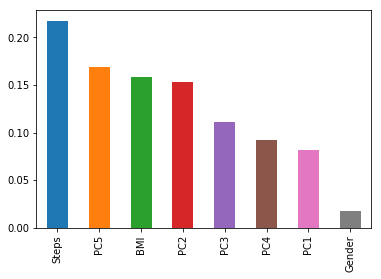

In [94]:
random_forest= RandomForestClassifier(n_estimators = 315,
 min_samples_split = 7,
 min_samples_leaf = 2,
 max_features = 'auto',
 max_depth = 14,
 bootstrap = False , random_state = 42)
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
importance = pd.Series(random_forest.feature_importances_, index=X.columns)
importance.nlargest(10).plot(kind='bar');
plt.show()

In [99]:
random_state = list(range(1,200))

d1_train_acc = []
d1_test_acc = []
d1_auc_score = []

for i in random_state :
    
    X_pcs = pcs[['PC3', 'PC2', 'PC5', 'Gender', 'BMI', 'Steps']]
    Y_pcs = pcs['Weight_loss_band']
    
    X_train, X_test, y_train, y_test= train_test_split(X_pcs,Y_pcs, test_size = 0.2, random_state = i) 
    
    random_forest= RandomForestClassifier(n_estimators = 315,
     min_samples_split = 7,
     min_samples_leaf = 2,
     max_features = 'auto',
     max_depth = 14,
     bootstrap = False)
    
    random_forest.fit(X_train,y_train)
    y_pred = random_forest.predict(X_test) 

    rf_train_acc = random_forest.score(X_train, y_train)
    rf_test_acc = accuracy_score(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)

    d1_train_acc.append(rf_train_acc)
    d1_test_acc.append(rf_test_acc)
    d1_auc_score.append(auc_score)
    

print('Mean Training Accuracy:', np.mean(d1_train_acc)) 
print('Mean Test Accuracy:', np.mean(d1_test_acc))
print(statistics.stdev(d1_test_acc))

print('AUC score equals',np.mean(d1_auc_score))
print('Standard Deviation for auc score',statistics.stdev(d1_auc_score))

Mean Training Accuracy: 0.9987437185929648
Mean Test Accuracy: 0.6654103852596316
0.11799311686166586
AUC score equals 0.6060452877663933
Standard Deviation for auc score 0.1392229974682876


In [109]:
scores = cross_val_score(rf,X_train,y_train, cv=5)
scores               
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.57 (+/- 0.34)


/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
